### Frequency of Answers for Questions 1 and 2

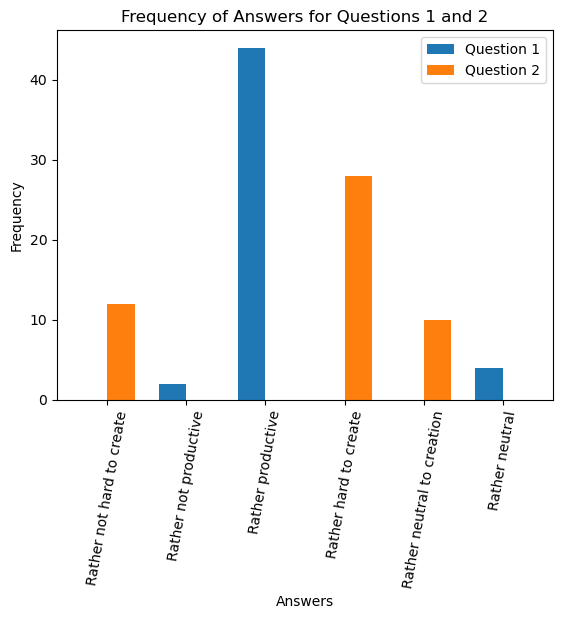

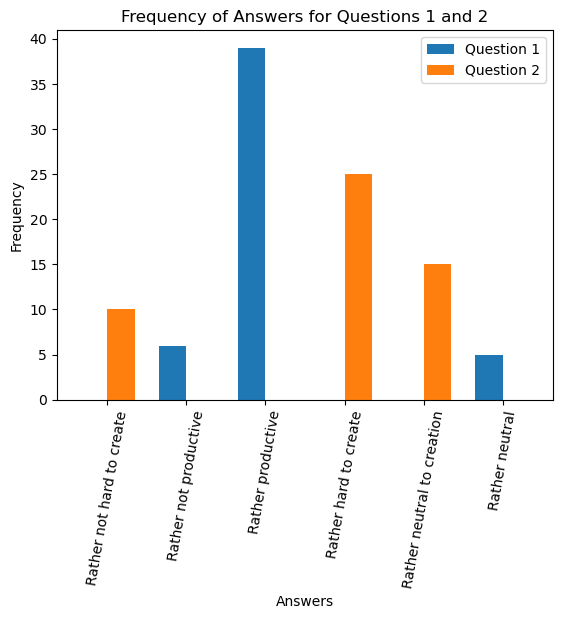

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sheets = pd.read_excel("posts100_tagged_with_GPT4.xlsx", sheet_name=None)
for sheet_name, df in sheets.items():
    # Count frequencies
    freq1 = df['GPT Grade1'].value_counts()
    freq2 = df['GPT Grade2'].value_counts()
    # Plot
    
    # Ensure both series have the same index for proper comparison
    all_answers = list(set(freq1.index).union(set(freq2.index)))
    freq1 = freq1.reindex(all_answers, fill_value=0)
    freq2 = freq2.reindex(all_answers, fill_value=0)

    # Plotting
    fig, ax = plt.subplots()
    index = np.arange(len(freq1.index))
    bar_width = 0.35

    rects1 = ax.bar(index, freq1.values, bar_width, label='Question 1')
    rects2 = ax.bar(index + bar_width, freq2.values, bar_width, label='Question 2')

    ax.set_xlabel('Answers')
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of Answers for Questions 1 and 2')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(freq1.index)
    ax.legend()

    plt.xticks(rotation=80)  # Rotate labels to fit longer text
    plt.show()

### Word Cloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


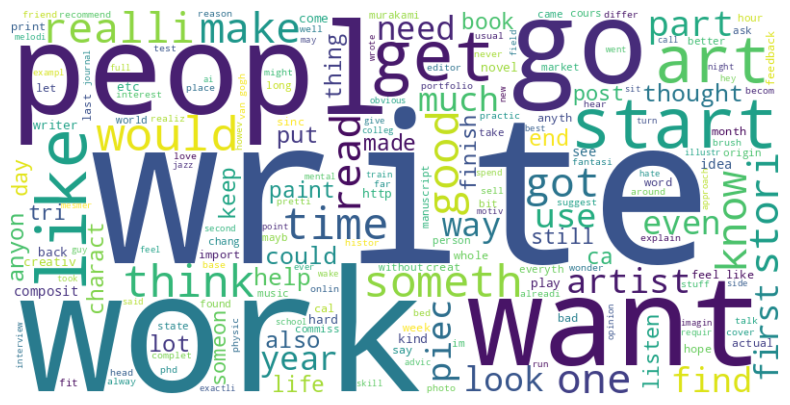

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


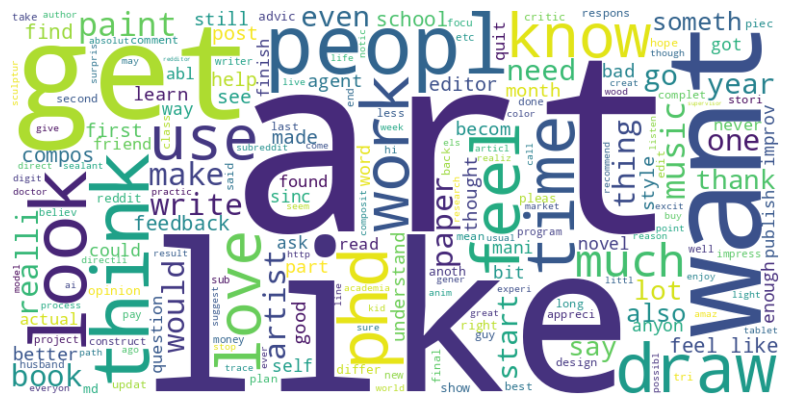

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer



sheets = pd.read_excel("posts100_tagged_with_GPT4.xlsx", sheet_name=None)
for sheet_name, df in sheets.items():
    text_data = ' '.join(df['Post'].dropna())  # Concatenate text, dropping any NaN values
    stemmer = PorterStemmer()
    # Make sure you've downloaded the required NLTK resources
    nltk.download('punkt')
    nltk.download('stopwords')

    # Tokenize and clean the text
    words = word_tokenize(text_data.lower())  # Convert text to lower case and tokenize
    filtered_words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    stemmed_words = [stemmer.stem(token) for token in filtered_words]
    cleaned_text = ' '.join(stemmed_words)  # Recombine into single string without stopwords
    # Example with more customization
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        colormap='viridis',  # Use matplotlib colormap
        stopwords=stopwords.words('english')
    ).generate(cleaned_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
